<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/odev83_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Regression Project
Data Set: [Mercedes-Benz Greener Manufacturing](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing) <br>
*\"Can you cut the time a Mercedes-Benz spends on the test bench?\"*

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
title_font = {"family":"sans-serif", 
              "color":"gray", 
              "size":16, 
              "weight":"bold"}
axis_font = {"family":"sans", 
              "color":"gray", 
              "size":14, 
              "weight":"normal"}

train = pd.read_csv("/content/drive/My Drive/MertColab/proje2/train.csv")
test = pd.read_csv("/content/drive/My Drive/MertColab/proje2/test.csv")

# Let's convert the data of these columns to numeric values.
# e.g a=1, c=3, z=26, aa=27, ac=29, ba=54, bd=57 etc.
from string import ascii_lowercase

for data in (test, train):
    for col in data.columns[1:10]:
        temp = 1
        for var1 in ascii_lowercase:
            var2 = "a" + var1
            var3 = "b" + var1
            data[col] = data[col].replace(var1, temp)
            data[col] = data[col].replace(var2, temp+26)
            data[col] = data[col].replace(var3, temp+26*2)
            temp+=1
        data[col] = data[col].astype("int64")    # data types are also changed.

# Standardization of these numeric values
from sklearn.preprocessing import scale

for col in train.columns[2:10]:
    train[col] = scale(train[col])
    test[col] = scale(test[col])

# REGRESSION MODELS
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

X = train.iloc[:, 2:]
Y = train.y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
results_model = sm.OLS(y_train, x_train)
results_ols = results_model.fit()
print("\nAdjusted R-square value of OLS Model: %.4f" %results_ols.rsquared_adj)

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
lasso_CV = LassoCV(alphas=np.logspace(-1, 10, 10), cv=10).fit(x_train, y_train)
lasso_score = lasso_CV.score(x_train, y_train)
print("Adjusted R-square value of Lasso Model: %.4f" %lasso_score)

ridge_CV = RidgeCV(alphas=np.logspace(-4, 100, 10), cv=10).fit(x_train, y_train)
ridge_score = ridge_CV.score(x_train,y_train)
print("Adjusted R-square value of Ridge Model: %.4f" %ridge_score)

elasticNet_CV = ElasticNetCV(alphas=np.logspace(-6, 100, 20), l1_ratio=0.5, cv=10).fit(x_train, y_train)
elasticNet_score = elasticNet_CV.score(x_train, y_train)
print("Adjusted R-square value of ElasticNet Model: %.4f" %elasticNet_score)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Adjusted R-square value of OLS Model: 0.5575
Adjusted R-square value of Lasso Model: 0.5386
Adjusted R-square value of Ridge Model: 0.5915
Adjusted R-square value of ElasticNet Model: 0.5913


***
# Ödev 8.3 - Random Forest (Project 2)

In [ ]:
#from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
#import pydotplus
#import graphviz
#from IPython.display import Image

In [ ]:
x_train.drop("const", inplace=True, axis="columns")

In [ ]:
%%time
parameters = {"n_estimators":range(50,251,50), 
              "max_depth":range(1,11), 
              "min_samples_split":range(2,5)}
forest1 = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(estimator=forest1, param_grid=parameters, cv=10)
grid_cv.fit(x_train, y_train)
y_predict = grid_cv.predict(x_test)
mse_forest1 = mean_squared_error(y_predict, y_test)
print("En iyi eğitim parametreleri :", grid_cv.best_params_)
print("En iyi eğitim skoru         :", grid_cv.best_score_)
print(f"Root Mean Square Error değeri: {np.sqrt(mse_forest1):.2f}\n")

En iyi eğitim parametreleri : {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
En iyi eğitim skoru         : 0.5637510020095595
Root Mean Square Error değeri: 7.90

CPU times: user 1h 29min 22s, sys: 4.87 s, total: 1h 29min 27s
Wall time: 1h 29min 33s


In [ ]:
results = pd.DataFrame(grid_cv.cv_results_)
results = results[["param_max_depth", "param_min_samples_split",
                   "param_n_estimators", "mean_test_score"]]
results = results.sort_values(by="mean_test_score", ascending=False)
results.head(10)

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score
43,3,4,200,0.563751
33,3,2,200,0.563751
38,3,3,200,0.563751
42,3,4,150,0.563664
37,3,3,150,0.563664
32,3,2,150,0.563664
44,3,4,250,0.563618
39,3,3,250,0.563618
34,3,2,250,0.563618
31,3,2,100,0.563255


In [ ]:
print("Test score: ", grid_cv.score(x_test, y_test))

Test skoru:  0.5987850336963638


In [ ]:
%%time
# without GridSearchCV
forest2 = RandomForestRegressor(n_estimators=200, 
                                max_depth=None, 
                                random_state=42, 
                                min_samples_split=4)
display(forest2.fit(x_train, y_train))

In [ ]:
print("Test score:", forest2.score(x_test, y_test))

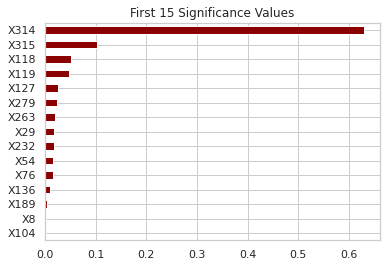

In [ ]:
# let's display the most significant variables
# below, "sp" means "significant pairs"
sp = dict(zip(x_train.columns, forest2.feature_importances_))
sp = {k: v for k, v in sorted(sp.items(), key=lambda i: i[1], reverse=True)}

# to keep things clear, we chose the first 15 words & values
significant_names = list(sp.keys())[:15]
significant_values = list(sp.values())[:15]

significance = pd.Series(data=significant_values,
                         index=significant_names).sort_values()
significance.plot(kind="barh", color="darkred")
plt.title("First 15 Significance Values")
plt.show()

---
***
---

# Project 3: Classification Project
Data Set: [Twitter US Airline Sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) <br>
*\"Analyze how travelers in February 2015 expressed their feelings on Twitter\"*

In [ ]:
%matplotlib inline
sns.set(style="whitegrid")

# calling our honor guest:
tweets = pd.read_csv("/content/drive/My Drive/MertColab/proje3/tweets.csv")

# ...and she takes off her fancy fur coat and some other unnecessary ornaments 
tweets.drop(columns=["tweet_id", "airline_sentiment_gold", "name", 
                     "negativereason_gold", "retweet_count", "tweet_created", 
                     "tweet_coord", "tweet_created", "tweet_location", 
                     "user_timezone"], 
            inplace=True)

# We are going to clean the tweets to keep only the English words
import re, string, nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

# The twitter accounts mentioned:
set_them = set()
for i in tweets.text:
    search_them = re.search(r"(^|[^@\w])@(\w{1,15})\b", i)
    give_them = search_them.group().lower()
    set_them.add(give_them)
del set_them

# These are the Twitter accounts we will remove:
# @virginamerica, @united, @southwestair, @deltaassist, @usairways, @americanair

def tweet_cleaner(tweet):
    "Symbols, numbers & airline brand cleaner function!"
    # First step: Symbols and numbers are gone:
    cleaned_string = re.sub("[^a-zA-Z]", " ", tweet)

    # Party people here speak only English. No other languages are allowed:
    cleaned_string = " ".join(w for w in nltk.wordpunct_tokenize(cleaned_string) \
         if w.lower() in words)

    # Second step: Putting them to a list:
    cleaned_set = set(cleaned_string.lower().split())
    # Let's get rid of our meaningless one-letter friends: 
    what_to_clean = list(string.ascii_lowercase)
    # ...and some of their drunk buddies:
    what_to_clean.extend(["it", "of", "co", "to", "http"])
    # We don't need any officials in our party as well:
    what_to_clean.extend(["virginamerica", "united", 
                       "southwestair", "deltaassist",
                       "usairways", "americanair"])
    for delete in what_to_clean:
        try:
            cleaned_set.remove(delete)
        except:
            continue    
    return list(cleaned_set)

# We need to convert the "airline_sentiment" to numbers.
for i,j in enumerate(tweets.airline_sentiment.unique()):
    tweets.airline_sentiment = tweets.airline_sentiment.replace(j, i)
tweets.airline_sentiment.astype("int64")

# We are going to collect all the words and give them binary inputs (1 or 0)
# according to their entities in the tweets.
all_words = set()
rows=[]
for i in tweets.index:
    listed_tweet = tweet_cleaner(tweets.text[i])
    rows.append(listed_tweet)
    all_words.update(listed_tweet)

# filling the data frame with binary values according to the words
df_words = pd.DataFrame(0, columns=all_words, index=tweets.index)
for i in tweets.index:
    df_words.loc[i, rows[i]]=1

# it's time to concatenate the data frames
tweets = pd.concat([tweets, df_words], ignore_index=False, axis="columns")

# Linear Regression Models
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

X = tweets.iloc[:, 6:]
Y = tweets.airline_sentiment
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lr_model1 = LogisticRegression(C=0.1, solver="lbfgs", max_iter=300, n_jobs=-1)
lr_model1.fit(x_train, y_train)
train_score_model1 = lr_model1.score(x_train, y_train)
test_score_model1 = lr_model1.score(x_test, y_test)

print("\nTrain score with 'lbfgs' solver: {:.3f}".format(train_score_model1))
print("Test score with 'lbfgs' solver: {:.3f}".format(test_score_model1), "\n")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.

Train score with 'lbfgs' solver: 0.824
Test score with 'lbfgs' solver: 0.789 



***
# Ödev 8.3 - Random Forest (Project 3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
# without GridSearchCV
results = pd.DataFrame(columns=["max_depth", "n_estimators", 
                                "min_samples_split", "accuracy_score"])

parameters = [[50,None,2], [100,None,2], 
              [100,2,3], [200,3,4]]

def forest(n, depth, split):
    global results
    forest1 = RandomForestClassifier(n_estimators=n, 
                                    max_depth=depth, 
                                    random_state=42, 
                                    min_samples_split=split)
    forest1.fit(x_train, y_train)
    y_predict = forest1.predict(x_test)
    accuracy_value = accuracy_score(y_test, y_predict)
    results = results.append({"max_depth":depth, 
                "n_estimators":n, 
                "min_samples_split":split, 
                "accuracy_score":accuracy_value}, 
                ignore_index=True)
    #return results

for n, depth, split in parameters:
    forest(n, depth, split)

results = results.sort_values(by="accuracy_score", ascending=False)
results = results.astype({"n_estimators":"int64", "min_samples_split":"int64"})
display(results)

,max_depth,n_estimators,min_samples_split,accuracy_score
1,NaN,100,2,0.764344
0,NaN,50,2,0.758880
2,2.0,100,3,0.645150
3,3.0,200,4,0.645150


CPU times: user 50.7 s, sys: 44.7 ms, total: 50.7 s
Wall time: 50.9 s


In [ ]:
# let's display the most significant variables
forest2 = RandomForestClassifier(n_estimators=100)
forest2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# below, "sp" means "significant pairs"
sp = dict(zip(x_train.columns, forest2.feature_importances_))
sp = {k: v for k, v in sorted(sp.items(), key=lambda i: i[1], reverse=True)}

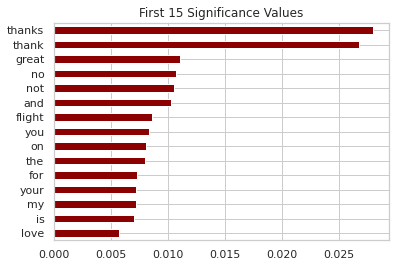

In [ ]:
# to keep things clear, we chose the first 15 words & values
significant_names = list(sp.keys())[:15]
significant_values = list(sp.values())[:15]

significance = pd.Series(data=significant_values,
                         index=significant_names).sort_values()
significance.plot(kind="barh", color="darkred")
plt.title("First 15 Significance Values")
plt.show()

# Bonus: Ensemble Methods
Stacking & Bagging